# Feature Selection: Credit Risk

* **Problem**: Feature Selection
* **Dataset**: [Publicly available credit risk dataset](online:http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data)
* **Algorithm**: [Black-box binary optimizations (BBBO)](https://quantum-journal.org/papers/q-2023-01-26-909/)
* **Journal Reference**: [Variational quantum algorithm for unconstrained black box binary optimization: Application to feature selection](https://quantum-journal.org/papers/q-2023-01-26-909/)
* **Backend**: [Matrix product state simulator](https://qiskit.org/documentation/stubs/qiskit_aer.AerSimulator.html)

### Result Plots

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
# Result files
result_dirs = ['vqa_d0/performance.csv', 'vqa_d1/performance.csv', 'vqa_d2/performance.csv', 'rfe/performance.csv', 'rfecv_acc/performance.csv', 'rfecv_log/performance.csv']

In [40]:
# Load data
train_log_loss = []
test_log_loss = []
train_log_loss_ci_low = []
test_log_loss_ci_low = []
train_log_loss_ci_high = []
test_log_loss_ci_high = []
for result_dir in result_dirs:
    file = open(result_dir)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    file.close()
    train_log_loss.append(float(rows[1][2][2:7]))
    test_log_loss.append(float(rows[2][2][2:7]))
    train_log_loss_ci_low.append(float(rows[3][2][2:8]))
    test_log_loss_ci_low.append(float(rows[4][2][2:8]))
    train_log_loss_ci_high.append(float(rows[3][3][1:7]))
    test_log_loss_ci_high.append(float(rows[4][3][1:7]))


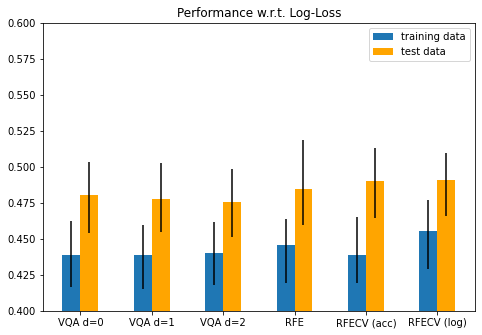

In [67]:
# Plot figure representing the final log-loss scores for the tested models w.r.t. train and test data including the confidence intervals evaluated at confidence of 95%
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['VQA d=0', 'VQA d=1', 'VQA d=2', 'RFE', 'RFECV (acc)', 'RFECV (log)']
ax.bar(np.array(range(len(test_log_loss)))-0.125, train_log_loss, label ='training data', width = 0.25, yerr=[np.subtract(train_log_loss, train_log_loss_ci_low), np.subtract(train_log_loss_ci_high, train_log_loss)])
plt.title('Performance w.r.t. Log-Loss')
ax.bar(np.array(range(len(test_log_loss)))+0.125, test_log_loss, color='orange', label='test data', width = 0.25, yerr=[np.subtract(test_log_loss, test_log_loss_ci_low), np.subtract(test_log_loss_ci_high, test_log_loss)])
plt.legend(loc='best')
# ax.set_xticklabels(labels)
plt.xticks(np.array(range(len(test_log_loss))), labels)
plt.ylim(0.4, 0.6)
plt.show()